Email classification into Ham and Spam using logistic regression

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
#load dataset 
path =r'C:\Users\NISHA GOSWAMI\Documents\email_classification.csv'
email = pd.read_csv(path)
print(email.columns)


Index(['email', 'label'], dtype='object')


In [91]:
X = email['email']  
y = email['label']
#  values as 1 for spam, 0 for ham)
y_binary = (y == 'spam').astype(int)

In [93]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
	X, y_binary, test_size=0.2, random_state=48)

In [95]:
# Create a TF-IDF vectorizer to convert text data into numerical features
vectorizer = TfidfVectorizer()

In [97]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a logistic regression on traiming data
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

LogisticRegression()

In [99]:
# Evaluate the model
y_pred = logreg.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 97.22%


In [101]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[22  0]
 [ 1 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.93      0.96        14

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36



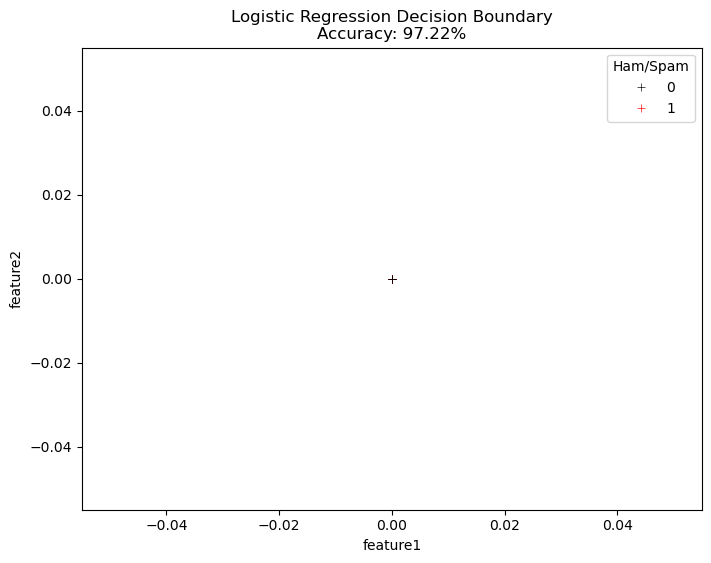

In [114]:
X_test_tfidf_dense = X_test_tfidf.toarray()
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_tfidf_dense[:, 0], y=X_test_tfidf_dense[:, 1], hue=y_test, palette={
				0: 'black', 1: 'red'}, marker='+')
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
	accuracy * 100))
plt.legend(title="Ham/Spam", loc="upper right")
plt.show()

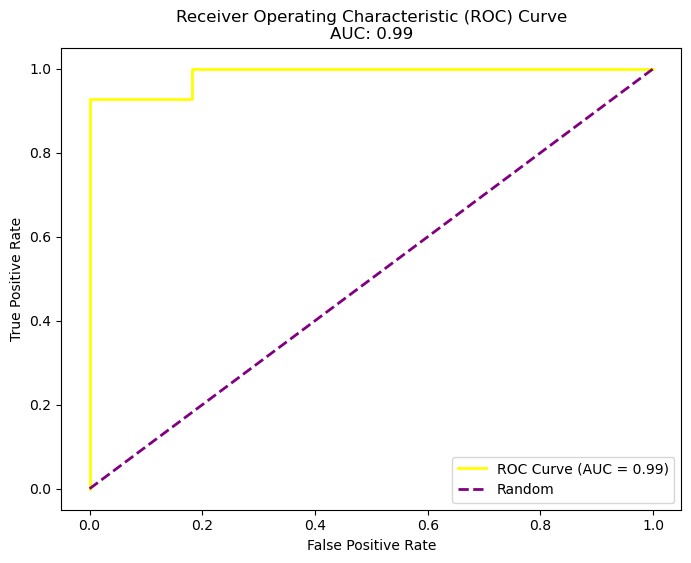

In [124]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
X_test_dense = X_test_tfidf.toarray()
# Plot ROC Curve
y_prob = model.predict_proba(X_test_dense)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='yellow', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAUC: {:.2f}'.format(
	roc_auc))
plt.legend(loc="lower right")
plt.show()